# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
val_set = val_datagen.flow_from_directory('dataset/val',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
model4 = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
model4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [6]:
model4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [7]:
model4.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding third convolution layer

In [8]:
model4.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
model4.add(tf.keras.layers.Conv2D(filters=265, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
model4.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
model4.add(tf.keras.layers.Dense(units=256, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.3))

### Step 5 - Output Layer

In [12]:
model4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 265)         3

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
history = model4.fit(x = training_set, validation_data = val_set, epochs = 25)

Epoch 1/25
163/163 [==============================] - 102s 620ms/step - loss: 0.5865 - accuracy: 0.7452 - val_loss: 0.4512 - val_accuracy: 0.8750
Epoch 2/25
163/163 [==============================] - 98s 603ms/step - loss: 0.2963 - accuracy: 0.8711 - val_loss: 0.3609 - val_accuracy: 0.8125
Epoch 3/25
163/163 [==============================] - 99s 606ms/step - loss: 0.2054 - accuracy: 0.9131 - val_loss: 0.5086 - val_accuracy: 0.7500
Epoch 4/25
163/163 [==============================] - 99s 608ms/step - loss: 0.1674 - accuracy: 0.9326 - val_loss: 1.0465 - val_accuracy: 0.6250
Epoch 5/25
163/163 [==============================] - 99s 606ms/step - loss: 0.1454 - accuracy: 0.9459 - val_loss: 0.4809 - val_accuracy: 0.6875
Epoch 6/25
163/163 [==============================] - 98s 603ms/step - loss: 0.1476 - accuracy: 0.9454 - val_loss: 0.6698 - val_accuracy: 0.6250
Epoch 7/25
163/163 [==============================] - 935s 6s/step - loss: 0.1347 - accuracy: 0.9492 - val_loss: 0.6685 - val_acc

## Accuracy

In [16]:
train_loss, train_acc  = model4.evaluate(training_set)
test_loss, test_acc = model4.evaluate(test_set)
train_acc = train_acc*100
test_acc = test_acc*100
print('train: %.2f, test: %.2f' % (train_acc, test_acc))

20/20 [==============================] - 9s 466ms/step - loss: 0.3809 - accuracy: 0.8734
train: 96.26, test: 87.34


## Model Accuracy Graph

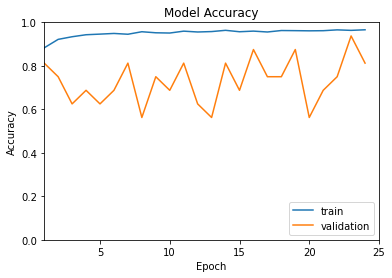

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([1,25])
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.savefig('model4_AccuracyVsValidationAccuracy.jpg')

## Model Loss Graph

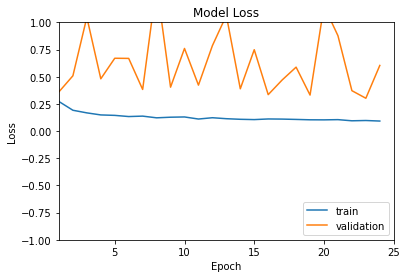

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-1, 1])
plt.xlim([1,25])
plt.title('Model Loss')
plt.legend(loc='lower right')
plt.savefig('model4_LossVsValidationLoss.jpg')

In [19]:
model4.save('cnnModel4.h5')